In [97]:
#1读取数据
import pandas as pd 

pd.set_option('display.max_columns', 10000)#列数设置为10000
pd.set_option('display.width', 10000)

dataset=pd.read_csv('SupplyChain.csv',encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [98]:
#看看是否有缺失值
temp=dataset.isnull().sum()
temp
#可以看到缺失值很多，这个时候把缺失值大于0的部分给拿出来

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [99]:
temp[temp>0]#这样就把有缺失值的全部给提取出来了

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [100]:
#将firstName和LastName合并
dataset['Customer Full Name']=dataset['Customer Fname']+dataset['Customer Lname']
dataset[ ['Customer Full Name','Customer Lname','Customer Fname'] ]

,Customer Full Name,Customer Lname,Customer Fname
0,CallyHolloway,Holloway,Cally
1,IreneLuna,Luna,Irene
2,GillianMaldonado,Maldonado,Gillian
3,TanaTate,Tate,Tana
4,OrliHendricks,Hendricks,Orli
...,...,...,...
180514,MariaPeterson,Peterson,Maria
180515,RonaldClark,Clark,Ronald
180516,JohnSmith,Smith,John
180517,MarySmith,Smith,Mary


In [101]:
#探索一下ZipCode
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [102]:
#看一下里面有多少个确实值
dataset['Customer Zipcode'].isnull().sum()       #可以看到有3个缺失值

3

In [103]:
#用0进行填充一下
dataset['Customer Zipcode']=dataset['Customer Zipcode'].fillna(0)
dataset['Customer Zipcode'].isnull().sum()#填充完之后就没有缺失值

0

In [104]:
#导包 准备可视化一下数据的热力图
import matplotlib.pyplot as plt
import seaborn as sns
#换个名字，用data来表示吧,节省一下字母
data=dataset
data.corr #这个相关系数的表太长了，画图看一看

<bound method DataFrame.corr of             Type  Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  Sales per customer   Delivery Status  Late_delivery_risk  Category Id   Category Name Customer City Customer Country Customer Email Customer Fname  Customer Id Customer Lname Customer Password Customer Segment Customer State             Customer Street  Customer Zipcode  Department Id Department Name   Latitude   Longitude        Market  Order City Order Country  Order Customer Id order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Product Price  Order Item Profit Ratio  Order Item Quantity       Sales  Order Item Total  Order Profit Per Order    Order Region        Order State     Order Status  Order Zipcode  Product Card Id  Product Category Id  Product Description                                      Product Image                               Product Name  Product Price  Product 

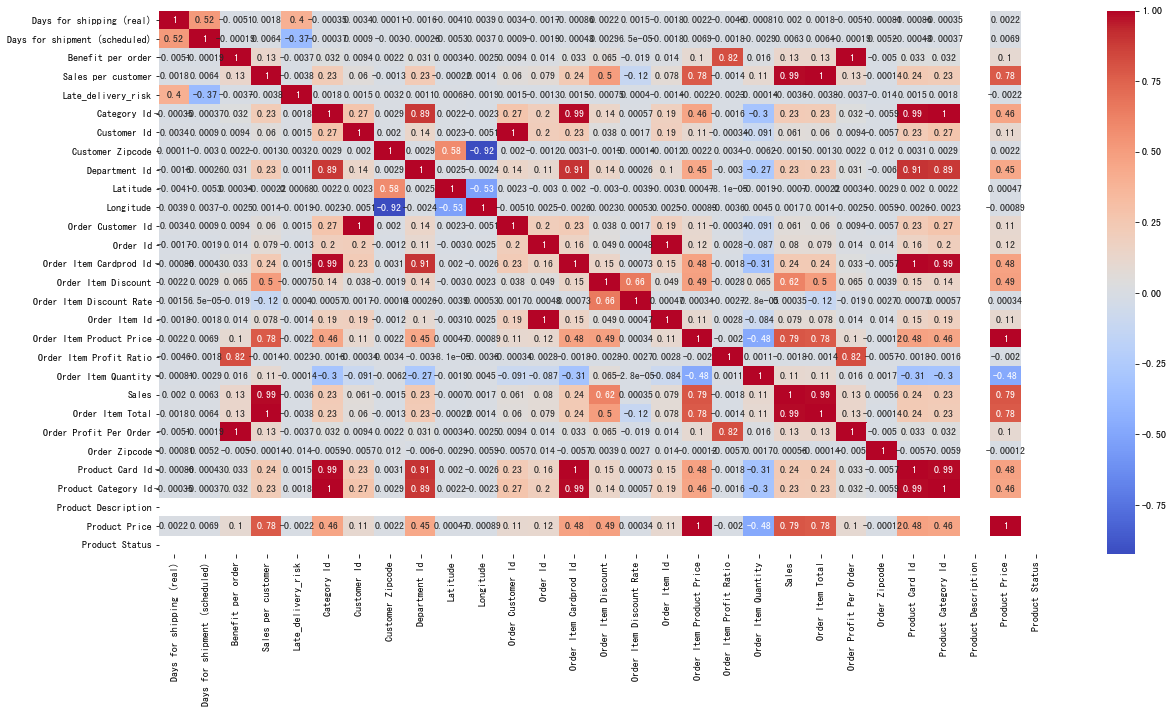

In [105]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')#通过观察表发，除了自己跟自己相关性较强以外，其他有些数据之间的相关性还是挺强的

In [106]:
#按照不同的Market, Order Region进行数据探索
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [107]:
#对销售额进行探索Sales per customer
market=data.groupby('Market')
market['Sales per customer'].sum()

Market
Africa          2.061679e+06
Europe          9.769198e+06
LATAM           9.235762e+06
Pacific Asia    7.434263e+06
USCA            4.553500e+06
Name: Sales per customer, dtype: float64

In [108]:
#排个序
market['Sales per customer'].sum().sort_values(ascending=False)

Market
Europe          9.769198e+06
LATAM           9.235762e+06
Pacific Asia    7.434263e+06
USCA            4.553500e+06
Africa          2.061679e+06
Name: Sales per customer, dtype: float64

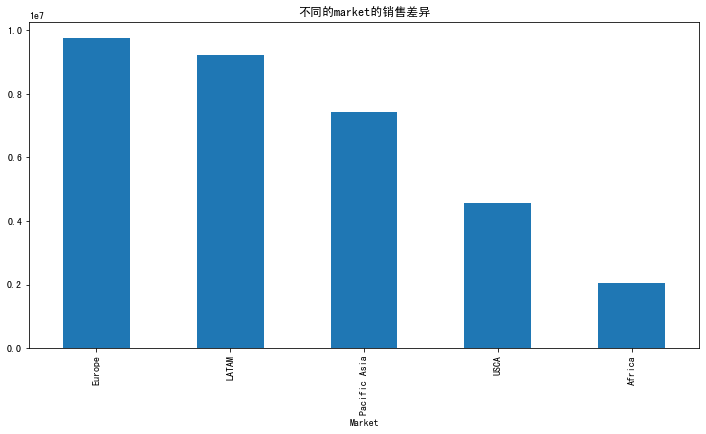

In [109]:
#可视化呈现
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="不同的market的销售差异")
#可以看到第一名是欧洲，依次到最后非洲

In [110]:
#对Order Region进行数据探索
data['Order Region'].value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

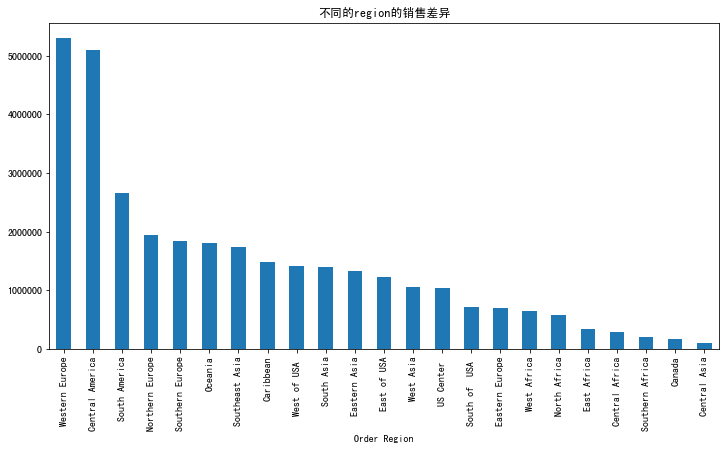

In [111]:
#可视化呈现
region=data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="不同的region的销售差异")

In [112]:
#对Category Name进行数据探索
print(data['Category Name'].value_counts())

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

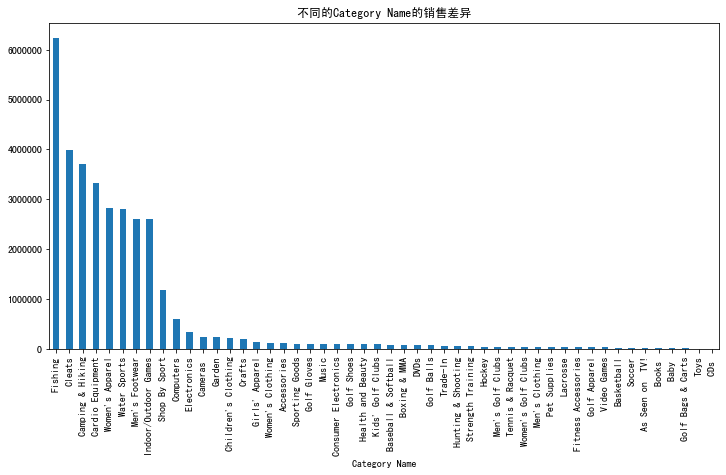

In [113]:
#可视化呈现
CategoryName=data.groupby('Category Name')
CategoryName['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="不同的Category Name的销售差异")

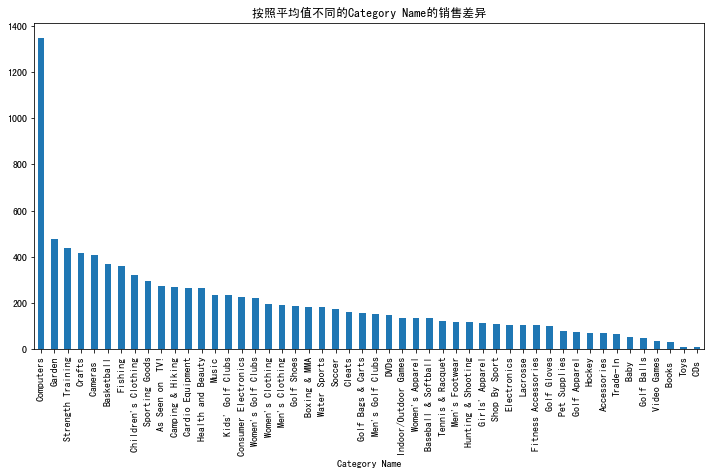

In [114]:
CategoryName['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title="按照平均值不同的Category Name的销售差异")

In [115]:
#按照不同的时间维度（年，月，星期，小时）的趋势Product Price与Sales per customer 相关性如何
data['order date (DateOrders)'].describe()

count             180519
unique             65752
top       9/6/2017 12:28
freq                   5
Name: order date (DateOrders), dtype: object

In [116]:
#创建成时间戳
temp=pd.DatetimeIndex(data['order date (DateOrders)'])

In [117]:
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00', '2018-01-13 12:06:00', '2018-01-13 11:45:00', '2018-01-13 11:24:00', '2018-01-13 11:03:00', '2018-01-13 10:42:00', '2018-01-13 10:21:00', '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00', '2016-01-16 06:28:00', '2016-01-16 06:07:00', '2016-01-16 05:04:00', '2016-01-16 03:40:00', '2016-01-16 01:34:00', '2016-01-15 21:00:00', '2016-01-15 20:18:00', '2016-01-15 18:54:00'], dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [118]:
# 获取不同尺度的时间,year month week hour month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


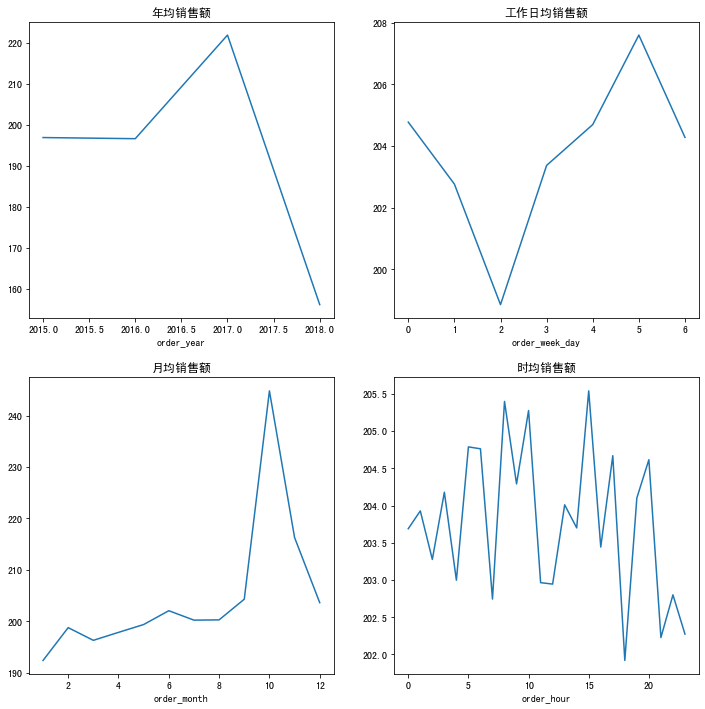

In [119]:
plt.figure()
plt.subplot(2,2,1)
df_year=data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12,12),title="年均销售额")

plt.subplot(2,2,2)
df_week_day=data.groupby('order_week_day')
df_week_day['Sales'].mean().plot(figsize=(12,12),title="工作日均销售额")

plt.subplot(2,2,3)
df_month=data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12),title="月均销售额")

plt.subplot(2,2,4)
df_hour=data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12),title="时均销售额")

Text(0, 0.5, 'Sales per customer')

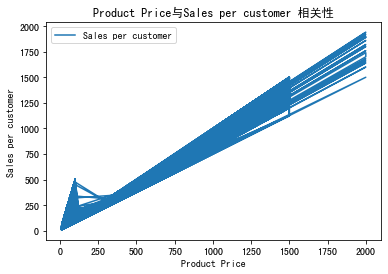

In [120]:
#Product Price与Sales per customer 相关性如何
data.plot(x='Product Price',y='Sales per customer')#可以看出大致成正比
plt.title('Product Price与Sales per customer 相关性')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')

In [121]:
import numpy as np
np.sort(data['Product Price'])

array([   9.98999977,    9.98999977,    9.98999977, ..., 1999.98999   ,
       1999.98999   , 1999.98999   ])

In [122]:
data['order_week_day'].max()

6

In [123]:
#统计最后一笔订单的时间
#data['order date (DateOrders)'].max()#单这样做是不对的 格式不对 会出现错   '9/9/2017 9:50'
data['order date (DateOrders)']=pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [124]:
import datetime
present=datetime.datetime(2018,2,1)
present

datetime.datetime(2018, 2, 1, 0, 0)

In [125]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (Da

In [126]:
#计算每个用户的RFM指标
#按照Order Custmer id 进行聚合
customer_seg=data.groupby('Order Customer Id').agg({'order date (DateOrders)':lambda x:(present -x.max()).days,
                                                    'Order Id':lambda x:len(x),'Sales':lambda x:x.sum() } )
customer_seg

,order date (DateOrders),Order Id,Sales
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [127]:
#将RFM数据划分为4个尺度
quantiles=customer_seg.quantile(q=[0.25,0.5,0.75])
quantiles

,order date (DateOrders),Order Id,Sales
0.25,75.0,1.0,293.040008
0.50,159.0,7.0,1499.825033
0.75,307.0,15.0,2915.880065


In [128]:
quantiles=quantiles.to_dict()#变成一个字典格式方便后文来索引
quantiles

{'order date (DateOrders)': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'Order Id': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'Sales': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

In [129]:
#将字段名称改为 R_Value F_Value M_value 
customer_seg.rename(columns={'order date (DateOrders)':'R_Value',
                           'Order Id':'F_Value',
                            'Sales':'M_Value'},inplace=True)
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [130]:
quantiles=customer_seg.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

In [131]:
#新建R_Value,用于将R_Value=>[1,4];R_Value越小越好，R_Score就越大
def R_Score(a,b,c):
    if a<=c[b][0.25]:
        return 4
    if a<=c[b][0.5]:
        return 3
    if a<=c[b][0.75]:
        return 2
    return 1

#Frequency,Money越大越好
def FM_Score(a,b,c):
    if a<=c[b][0.25]:
        return 1
    if a<=c[b][0.5]:
        return 2
    if a<=c[b][0.75]:
        return 3
    return 4

In [132]:
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [133]:
#新建R_score，用于将R_Value->[1,4]
customer_seg['R_Score']=customer_seg['R_Value'].apply(R_Score,args=('R_Value',quantiles))
customer_seg['F_Score']=customer_seg['F_Value'].apply(FM_Score,args=('F_Value',quantiles ))
customer_seg['M_Score']=customer_seg['M_Value'].apply(FM_Score,args=('M_Value',quantiles ))
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,499.950012,1,1,2
2,136,10,1819.730034,3,3,3
3,229,18,3537.680094,2,4,4
4,380,14,1719.630030,1,3,3
5,457,7,1274.750023,1,2,2
...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1
20754,0,1,215.820007,4,1,1
20755,0,1,327.750000,4,1,2


In [134]:
#计算RFM用户分层
def RFM_User(df):
    if df['M_Score']>2 and df['F_Score']>2 and df['R_Score']>2:
        return '重要价值用户'
    if df['M_Score']>2 and df['F_Score']<=2 and df['R_Score']>2:
        return '重要发展用户'   
    if df['M_Score']>2 and df['F_Score']>2 and df['R_Score']<=2:
        return '重要保持用户'
    if df['M_Score']>2 and df['F_Score']<=2 and df['R_Score']<=2:
        return '重要挽留用户'
    
    if df['M_Score']<=2 and df['F_Score']>2 and df['R_Score']>2:
        return '一般价值用户'
    if df['M_Score']<=2 and df['F_Score']<=2 and df['R_Score']>2:
        return '一般发展用户'   
    if df['M_Score']<=2 and df['F_Score']>2 and df['R_Score']<=2:
        return '一般保持用户'
    if df['M_Score']<=2 and df['F_Score']<=2 and df['R_Score']<=2:
        return '一般挽留用户'
    

In [135]:
customer_seg['Customer_Segmentation']=customer_seg.apply(RFM_User,axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,499.950012,1,1,2,一般挽留用户
2,136,10,1819.730034,3,3,3,重要价值用户
3,229,18,3537.680094,2,4,4,重要保持用户
4,380,14,1719.630030,1,3,3,重要保持用户
5,457,7,1274.750023,1,2,2,一般挽留用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1,一般发展用户
20754,0,1,215.820007,4,1,1,一般发展用户
20755,0,1,327.750000,4,1,2,一般发展用户


In [136]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (Da

In [137]:
#显示不同地区的支付类型情况
data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [138]:
pay_type1=data[data['Type']=='DEBIT']
pay_type2=data[data['Type']=='TRANSFER']
pay_type3=data[data['Type']=='PAYMENT']
pay_type4=data[data['Type']=='CASH']

In [139]:
pay_type1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,2018-01-13 10:42:00,75934,1360,39.330002,0.12,179249,327.750000,0.33,1,327.750000,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:42,First Class,ConstanceTerrell,2018,1,5,10,2018-01
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Natalie,19480,Mcfadden,XXXXXXXXX,Corporate,PR,2531 Wishing Square,725.0,2,Fitness,18.278439,-66.037056,Pacific Asia,Sangli,India,19480,2018-01-13 08:15:00,75927,1360,81.940002,0.25,179242,327.750000,0.10,1,327.750000,245.809998,24.580000,South Asia,Maharashtra,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 8:15,First Class,NatalieMcfadden,2018,1,5,8,2018-01
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Sade,19478,Lancaster,XXXXXXXXX,Corporate,PR,257 Harvest Close,725.0,2,Fitness,18.284050,-66.037056,Pacific Asia,Sangli,India,19478,2018-01-13 07:33:00,75925,1360,3.280000,0.01,179240,327.750000,-0.80,1,327.750000,324.470001,-259.579987,South Asia,Maharashtra,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 7:33,First Class,SadeLancaster,2018,1,5,7,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180505,DEBIT,2,4,112.669998,359.980011,Advance shipping,0,45,Fishing,Highland,EE. UU.,XXXXXXXXX,Christine,1038,Briggs,XXXXXXXXX,Corporate,CA,7127 Quiet Zephyr Nook,92346.0,7,Fan Shop,34.135822,-117.220947,Pacific Asia

([<matplotlib.axis.XTick at 0x7ff591e759d0>,
 <a list of 23 Text xticklabel objects>)

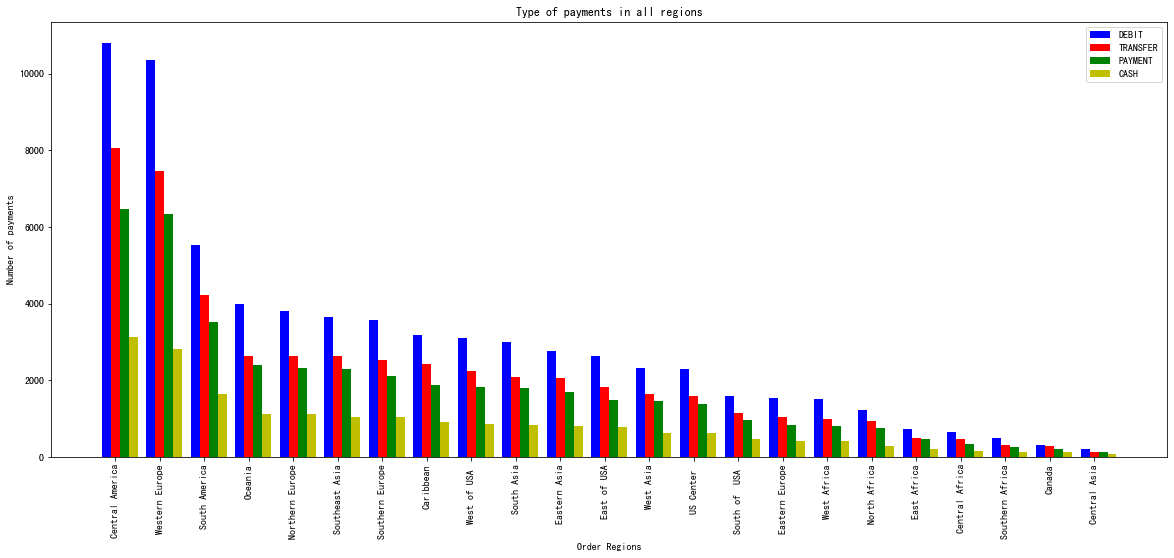

In [140]:
#获取4种支付方式中，不同地区的特点
count1=pay_type1['Order Region'].value_counts()
count2=pay_type2['Order Region'].value_counts()
count3=pay_type3['Order Region'].value_counts()
count4=pay_type4['Order Region'].value_counts()
#获取地区region的个数
region_num=len(count1)
fig,ax=plt.subplots(figsize=(20,8))
index=np.arange(region_num)
bar_width=0.2#每种类型的显示间隔
type1=plt.bar(index,count1,bar_width,color='b',label='DEBIT')
type2=plt.bar(index+bar_width,count2,bar_width,color='r',label='TRANSFER')
type3=plt.bar(index+2*bar_width,count3,bar_width,color='g',label='PAYMENT')
type4=plt.bar(index+3*bar_width,count4,bar_width,color='y',label='CASH')
plt.legend()
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Type of payments in all regions')

#显示刻度
names=data['Order Region'].value_counts().keys()
plt.xticks(index+bar_width,names,rotation='vertical')#rotation这个参数是让坐标垂直

# 分析结论
* DEBIT(借记)是所有地区中使用方式最多的支付方式
* CASH(现金)是所有地区中使用方式最少的支付方式

In [141]:
#看一下收益是否有为负的情况
loss=data[data['Benefit per order']<0]#对负收益的产品进行探索
loss#这样看的不是很清楚直观，做一个可视化的呈现

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Sade,19478,Lancaster,XXXXXXXXX,Corporate,PR,257 Harvest Close,725.0,2,Fitness,18.284050,-66.037056,Pacific Asia,Sangli,India,19478,2018-01-13 07:33:00,75925,1360,3.280000,0.01,179240,327.750000,-0.80,1,327.750000,324.470001,-259.579987,South Asia,Maharashtra,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 7:33,First Class,SadeLancaster,2018,1,5,7,2018-01
16,PAYMENT,5,2,-246.360001,321.200012,Late delivery,1,73,Sporting Goods,Canovanas,Puerto Rico,XXXXXXXXX,Brynne,19477,Giles,XXXXXXXXX,Corporate,PR,7342 Hazy Beacon Park,729.0,2,Fitness,18.395790,-65.872887,Pacific Asia,Seúl,Corea del Sur,19477,2018-01-13 07:12:00,75924,1360,6.560000,0.02,179239,327.750000,-0.77,1,327.750000,321.200012,-246.360001,Eastern Asia,Seúl,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 7:12,Second Class,BrynneGiles,2018,1,5,7,2018-01
28,DEBIT,3,4,-17.139999,272.029999,Advance shipping,0,73,Sporting Goods,Roseville,EE. UU.,XXXXXXXXX,Evelyn,19465,Kelly,XXXXXXXXX,Corporate,MI,3931 Gentle Ramp,48066.0,2,Fitness,41.868862,-84.573654,Pacific Asia,Guilin,China,19465,2018-01-13 03:00:00,75912,1360,55.720001,0.17,179227,327.750000,-0.06,1,327.750000,272.029999,-17.139999,Eastern Asia,Guangxi,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 3:00,Standard Class,EvelynKelly,2018,1,5,3,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180495,PAYMENT,3,4,-239.990006,299.989990,Advance shipping,0,45,Fishing,Roswell,EE. UU.,XXXXXXXXX,John,378,Stewart,XXXXXXXXX,Home Office,GA,2153 Iron Log Downs,30075.0,7,Fan Shop,34.047119,-83.824326,Pacific Asia,Shanghái,China,378

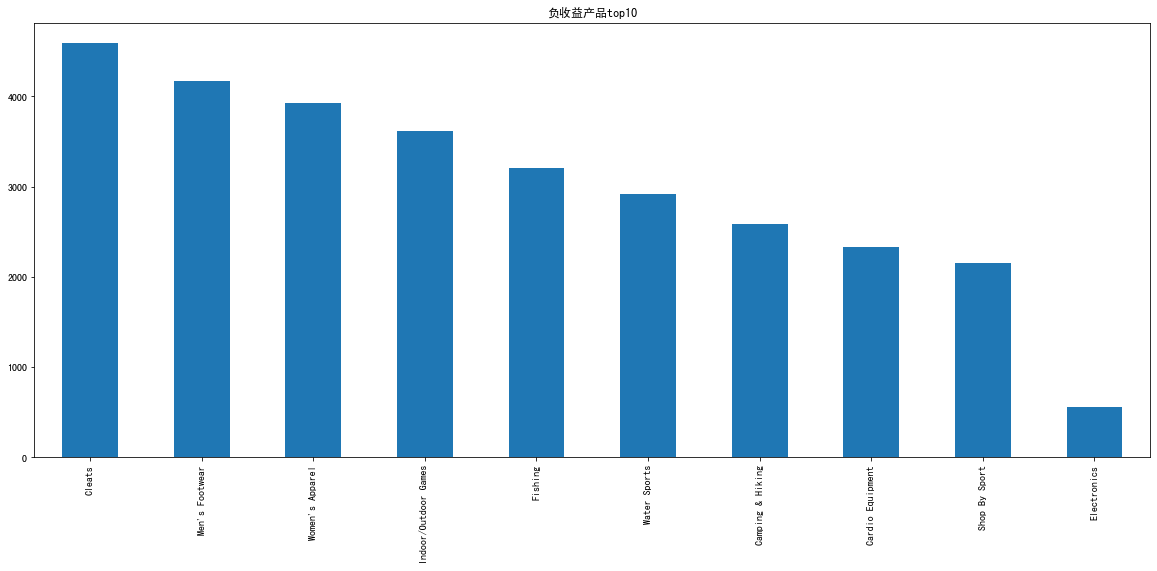

In [142]:
#显示top10的负收益产品
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='负收益产品top10')

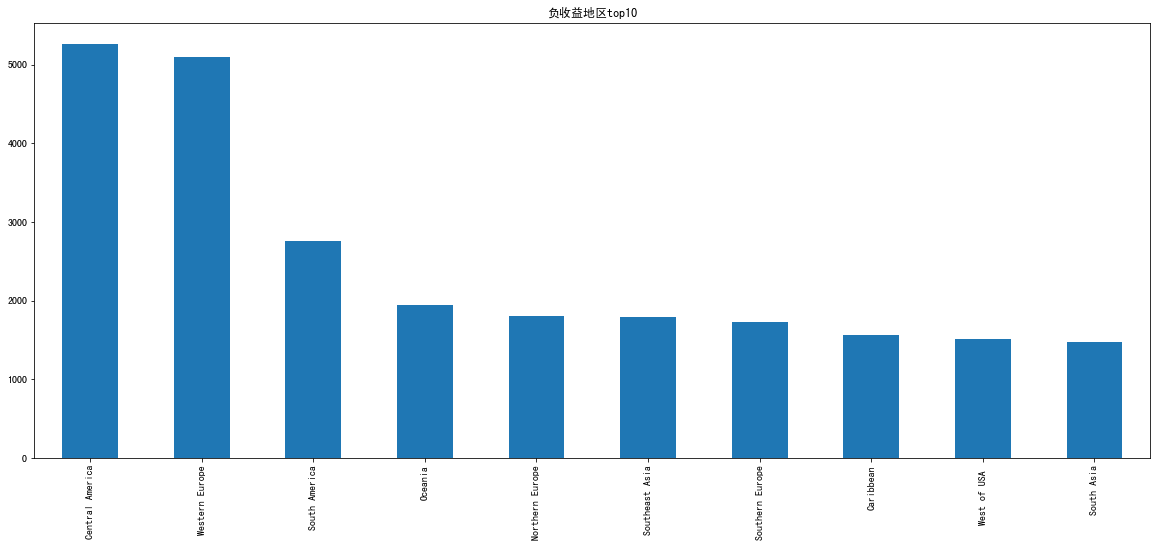

In [143]:
#显示top10的负收益地区
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='负收益地区top10')

In [144]:
#所有负产品带来的损失
print('总损失',loss['Benefit per order'].sum())#损失还是很庞大的

总损失 -3883547.345768667


In [145]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [146]:
#负收益，可能是欺诈交易，来自于哪种支付方式
data[data['Order Status']=='SUSPECTED_FRAUD']['Type'].value_counts()#可以看到转账transfer容易产生欺诈交易

TRANSFER    4062
Name: Type, dtype: int64

# transfer容易产生欺诈交易

Text(0, 0.5, 'Fraud Number')

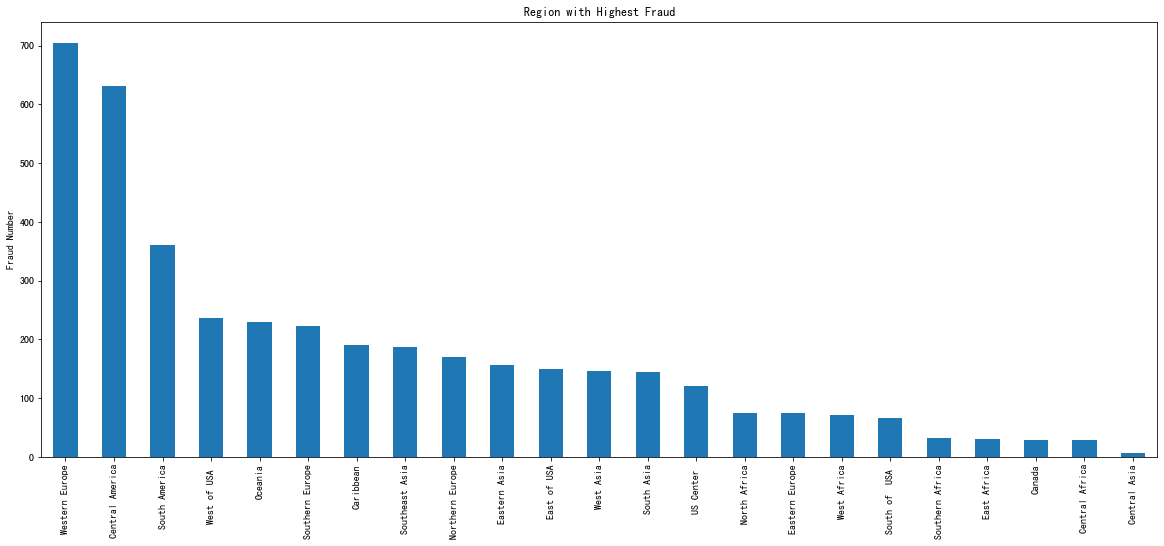

In [147]:
#显示不同地区的欺诈交易情况
high_fraud=data[data['Order Status']=='SUSPECTED_FRAUD']
high_fraud['Order Region'].value_counts().plot.bar(figsize=(20,8))
plt.title('Region with Highest Fraud')
plt.ylabel('Fraud Number')

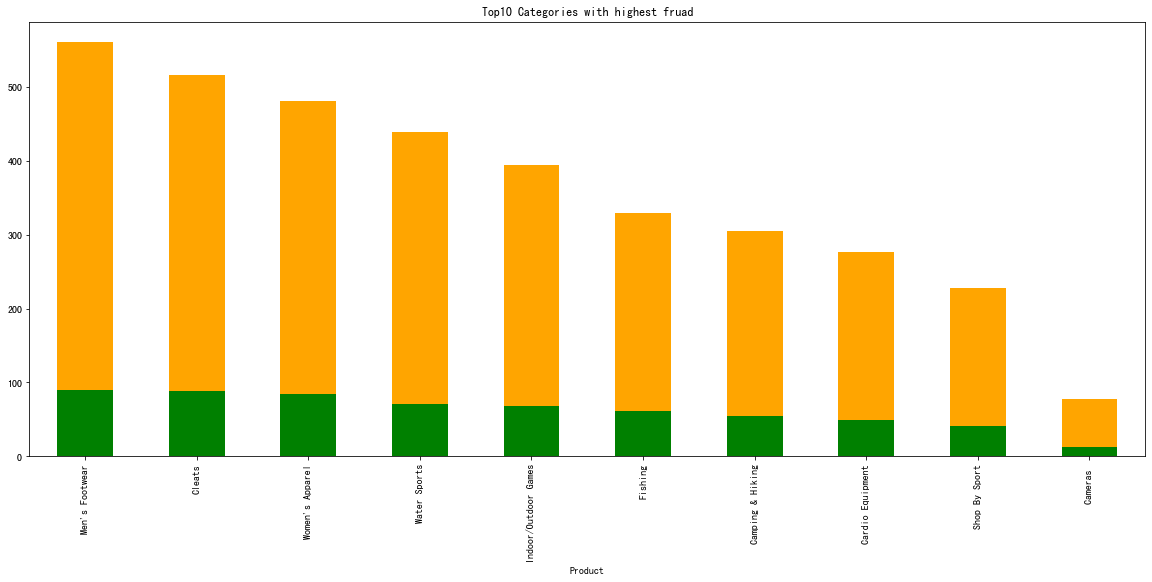

In [148]:
#Wstern Europe地区欺诈交易最多，将一个bar分成2个部分(堆积条形图)
high_fraud_total=data[data['Order Status']=='SUSPECTED_FRAUD']
high_fraud_we=data[(data['Order Status']=='SUSPECTED_FRAUD')&(data['Order Region']=='Western Europe')]
#找出风险最高的10个Category
fruad1=high_fraud_total['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title=' Fruad Category',color='orange')
fruad2=high_fraud_we['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title=' Fruad Category in Western Europe',color='green')
plt.title('Top10 Categories with highest fruad')
plt.xlabel('Product')
plt.show()

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (Da

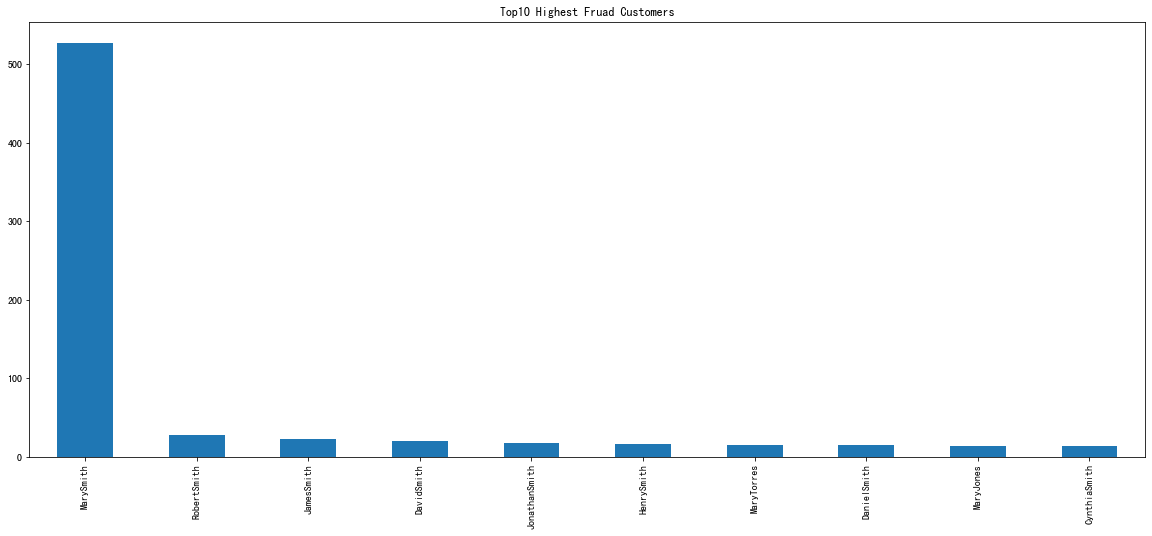

In [149]:
#筛选出top10 Customer（风险）
cus=data[data['Order Status']=='SUSPECTED_FRAUD']
print(cus.columns)#    这个Customer的tiop10肯定是去找name   Customer Full Name 
print('-'*100+"\n输出一下top10的Customer Full Name\n"+'-'*100)
print(cus['Customer Full Name'].value_counts().nlargest(10))
#数据可视化一下
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Top10 Highest Fruad Customers')

In [161]:
#找到MarySmith的交易金额
print(data[data['Customer Full Name']=='MarySmith']['Sales'].sum())#它一共买了多少钱
print(data[(data['Customer Full Name']=='MarySmith')&(data['Order Status']=='SUSPECTED_FRAUD')]['Sales'].sum()) #是史密斯且订单还是欺诈的

4771645.883297398
102491.66191043999


In [163]:
#文件保存一下,这行代码运行完之后就保存成了一个文件
import pickle
with open('data.pkl','wb') as file:
    pickle.dump(data,file)